# Text Classification Assessment 

### Goal: Given a set of text movie reviews that have been labeled negative or positive

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

## Complete the tasks in bold below!

**Task: Perform imports and load the dataset into a pandas DataFrame**
For this exercise you can load the dataset from `'../DATA/moviereviews.csv'`.

In [1]:
# CODE HERE

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns  

In [2]:
df = pd.read_csv('../DATA/moviereviews.csv')

In [3]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**TASK: Check to see if there are any missing values in the dataframe.**

In [4]:
#CODE HERE
df[df.isnull()].sum()

label     0.0
review    0.0
dtype: float64

In [5]:
df= df.dropna()

label      0
review    35
dtype: int64

**TASK: Remove any reviews that are NaN**

**TASK: Check to see if any reviews are blank strings and not just NaN. Note: This means a review text could just be: "" or "  " or some other larger blank string. How would you check for this? Note: There are many ways! Once you've discovered the reviews that are blank strings, go ahead and remove them as well. [Click me for a big hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [6]:
df[df['review'] == '']

,label,review


In [33]:
df.dtypes

label     object
review    object
dtype: object

In [7]:
drop = df[df['review'].apply(len)<10].index

In [8]:
drop

Int64Index([  57,   71,  147,  151,  283,  307,  313,  323,  343,  351,  427,
             501,  633,  675,  815,  851,  977, 1079, 1299, 1455, 1493, 1525,
            1531, 1763, 1851, 1905, 1993],
           dtype='int64')

In [9]:
df = df.drop(drop)

27

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


**TASK: Confirm the value counts per label:**

In [11]:
#CODE HERE
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

pos    969
neg    969
Name: label, dtype: int64

## EDA on Bag of Words

**Bonus Task: Can you figure out how to use a CountVectorizer model to get the top 20 words (that are not english stop words) per label type? Note, this is a bonus task as we did not show this in the lectures. But a quick cursory Google search should put you on the right path.  [Click me for a big hint](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [12]:
#CODE HERE
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
cv = CountVectorizer(stop_words='english')

In [22]:
count = cv.fit_transform(df['review'])


In [23]:
count

<1938x38596 sparse matrix of type '<class 'numpy.int64'>'
	with 470990 stored elements in Compressed Sparse Row format>

In [16]:
cv.get_feature_names

<bound method CountVectorizer.get_feature_names of CountVectorizer()>

In [36]:
freqs = zip(cv.get_feature_names(), count.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print((sorted(freqs, key=lambda x: -x[1]))[0:20])

[('film', 9065), ('movie', 5520), ('like', 3529), ('just', 2753), ('good', 2310), ('time', 2302), ('story', 2107), ('character', 1963), ('characters', 1795), ('way', 1598), ('make', 1577), ('life', 1536), ('does', 1494), ('films', 1474), ('really', 1474), ('plot', 1465), ('little', 1447), ('people', 1397), ('bad', 1336), ('man', 1335)]


Top 20 words used for Negative reviews.
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


Top 20 words used for Positive reviews.
[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


### Training and Data

**TASK: Split the data into features and a label (X and y) and then preform a train/test split. You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.20, random_state=101`**

In [37]:
#CODE HERE
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['label'], test_size=0.33, random_state=42)

### Training a Mode

**TASK: Create a PipeLine that will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

In [45]:
#CODE HERE
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [43]:
tfidf = TfidfVectorizer(stop_words= 'english')

In [46]:
svc = LinearSVC()

In [47]:
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [48]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

**TASK: Create a classification report and plot a confusion matrix based on the results of your PipeLine.**

In [49]:
#CODE HERE
from sklearn.metrics import classification_report, plot_confusion_matrix

In [50]:
pred = pipe.predict(X_test)

In [53]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         neg       0.84      0.84      0.84       308
         pos       0.85      0.85      0.85       332

    accuracy                           0.85       640
   macro avg       0.85      0.85      0.85       640
weighted avg       0.85      0.85      0.85       640



              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



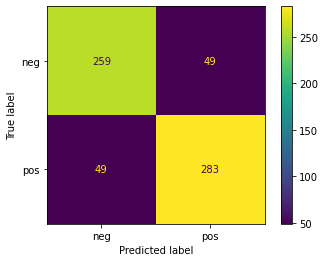

In [54]:
plot_confusion_matrix(pipe, X_test, y_test)

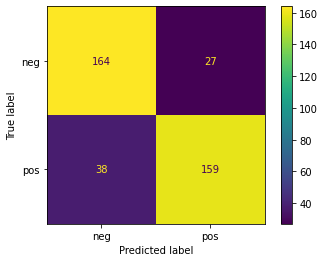